In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import iplot
#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/My Drive/zomato.csv")

In [ ]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

**DATA CLEANING**

In [ ]:
len(data['name'].unique())

8792

In [ ]:
data.isna().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [ ]:
feature_na=[feature for feature in data.columns if data[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [ ]:
null = pd.DataFrame({'Null Values' : data.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isnull().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null.style.background_gradient(cmap="Wistia")

,Null Values,Percentage Null Values
dish_liked,28078,54.291626
rate,7775,15.033741
phone,1208,2.335789
approx_cost(for two people),346,0.669026
rest_type,227,0.438927
cuisines,45,0.087012
location,21,0.040606
listed_in(type),0,0.000000
menu_item,0,0.000000
reviews_list,0,0.000000


In [ ]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
data.dropna(axis='index',subset=['rate'],inplace=True)

In [ ]:
data.shape

(43942, 17)

In [ ]:
def split(x):
    return x.split('/')[0]

In [ ]:
data['rate']=data['rate'].apply(split)

In [ ]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
data.replace('NEW',0,inplace=True)

In [ ]:
data.replace('-',0,inplace=True)

In [ ]:
data['rate']=data['rate'].astype(float)

**CALCULATING AVG RATING OF RESTAURANT**

In [ ]:
data_rate=data.groupby('name')['rate'].mean().to_frame()
data_rate=data_rate.reset_index()
data_rate.columns=['restaurant','rating']
data_rate.head(20).style.background_gradient(cmap="Wistia")

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


<Axes: xlabel='name'>

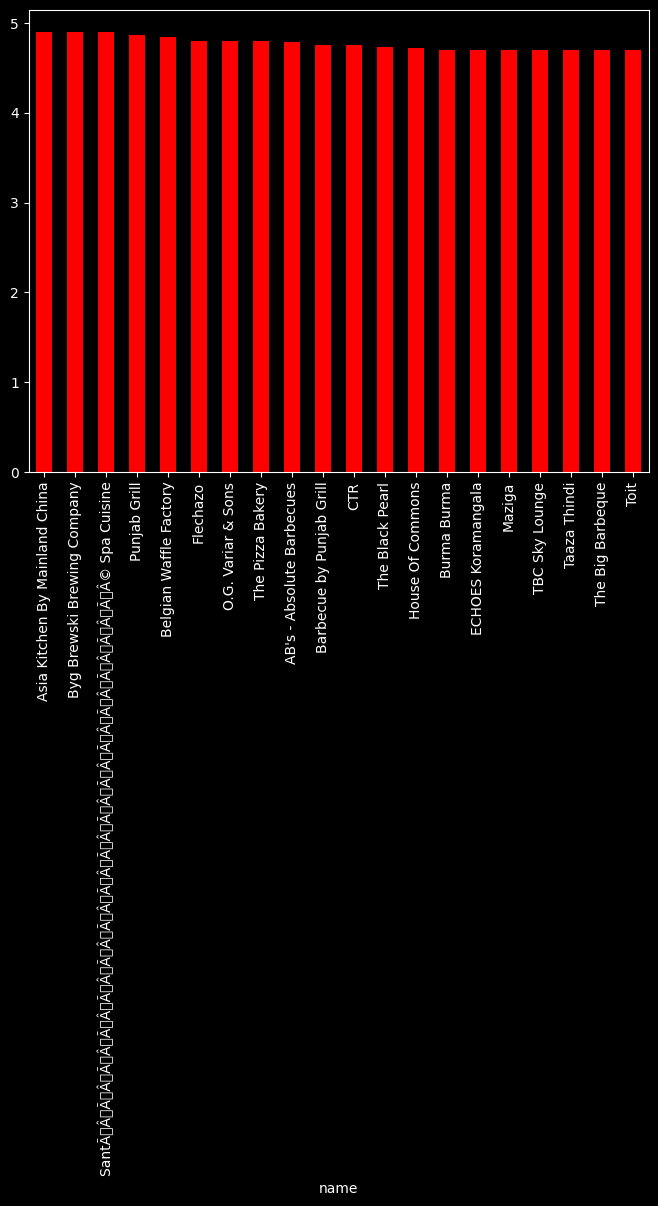

In [ ]:
plt.figure(figsize=(8,6))
data.groupby('name')['rate'].mean().nlargest(20).plot.bar(color='red')

**FREQUENCY DISTRIBUTION**

<Axes: xlabel='rating', ylabel='Density'>

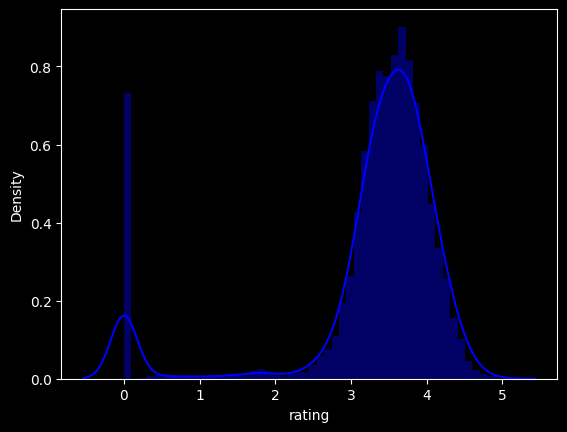

In [ ]:
sns.set_style()
sns.distplot(data_rate['rating'] ,color='blue')

**RESTAURANT ANALYSIS**

Text(0.5, 0, 'Number of outlets')

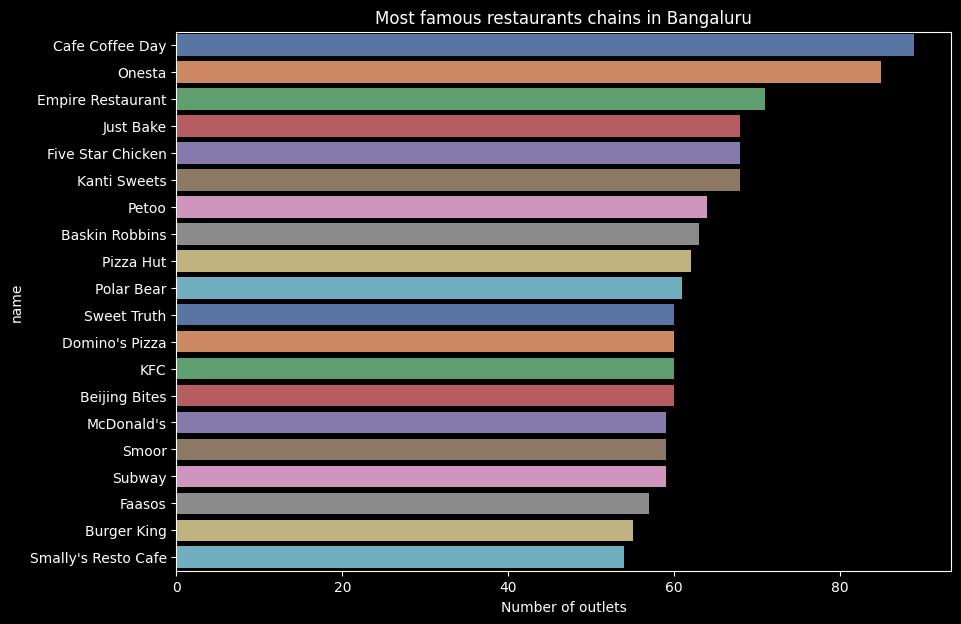

In [ ]:
plt.figure(figsize=(10,7))
chains=data['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

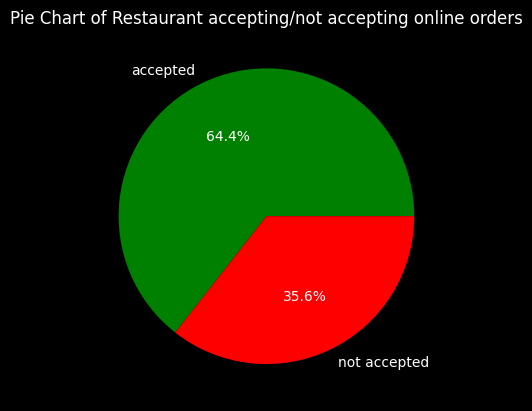

In [ ]:
x = data['online_order'].value_counts().values
labels = ['accepted', 'not accepted']

plt.pie(x, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Pie Chart of Restaurant accepting/not accepting online orders')
plt.show()

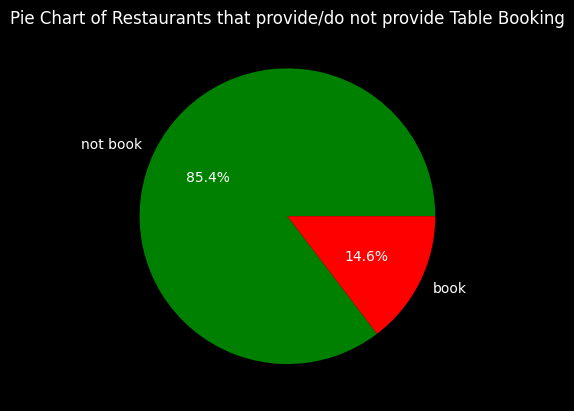

In [ ]:
x = data['book_table'].value_counts().values
labels = ['not book', 'book']

plt.pie(x, labels=labels, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Pie Chart of Restaurants that provide/do not provide Table Booking')
plt.show()

In [ ]:
data['rest_type'].isna().sum()

151

In [ ]:
data['rest_type'].dropna(inplace=True)

In [ ]:
data['rest_type'].isna().sum()

151

In [ ]:
len(data['rest_type'].unique())

88

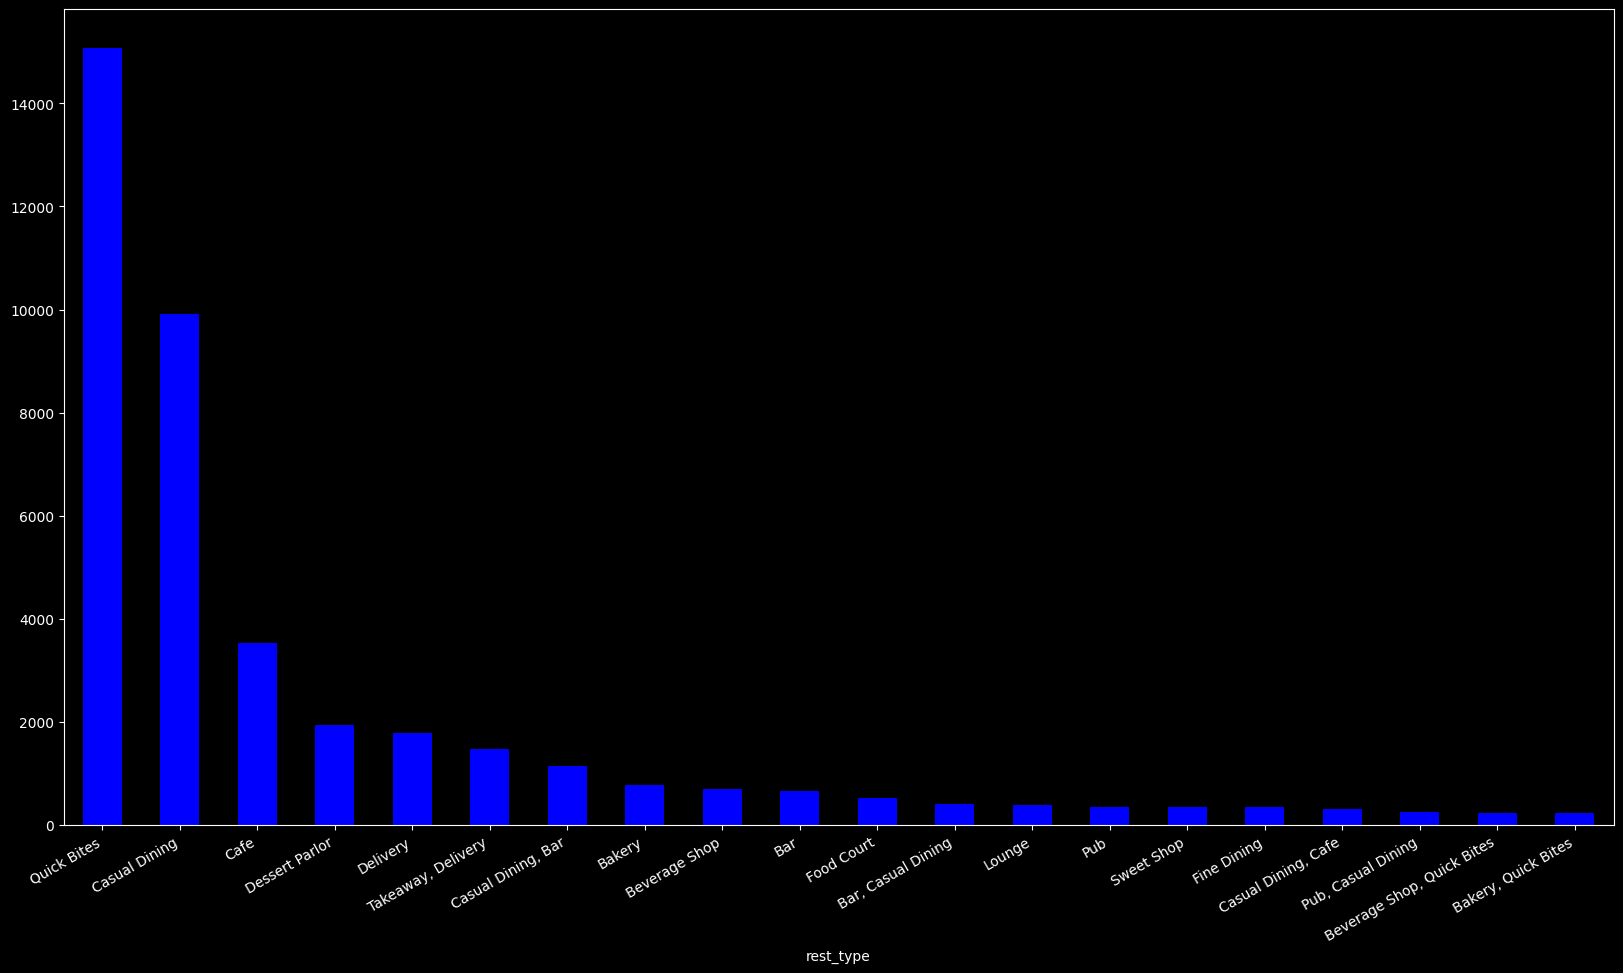

In [ ]:
plt.figure(figsize=(20,12))
data['rest_type'].value_counts().nlargest(20).plot.bar(color='blue')
plt.gcf().autofmt_xdate()

<Axes: xlabel='name'>

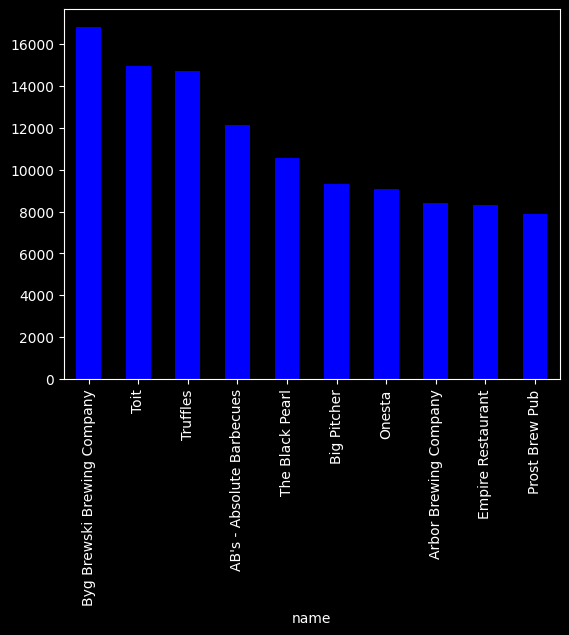

In [ ]:
data.groupby('name')['votes'].max().nlargest(10).plot.bar(color='blue')

In [ ]:
data.groupby('location')['name'].unique()

,name
location,
BTM,"[Sankranthi Veg Restaurant, Hearts Unlock Cafe..."
Banashankari,"[Jalsa, Spice Elephant, San Churro Cafe, Addhu..."
Banaswadi,"[Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi..."
Bannerghatta Road,"[Deja Vu Resto Bar, Fattoush, Empire Restauran..."
Basavanagudi,"[Grand Village, Timepass Dinner, Srinathji's C..."
...,...
West Bangalore,"[FreshMenu, Fit Dish Fetish, Garden City Mobil..."
Whitefield,"[Imperio Cafe, Night Diaries, LocalHost, AB's ..."
Wilson Garden,"[Tree Top, Sahana's (Nati Style), Karavali Kol..."


In [ ]:
restaurant=[]
location=[]
for key,location_df in data.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [ ]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10).style.background_gradient(cmap="Wistia")

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


<Axes: xlabel='location'>

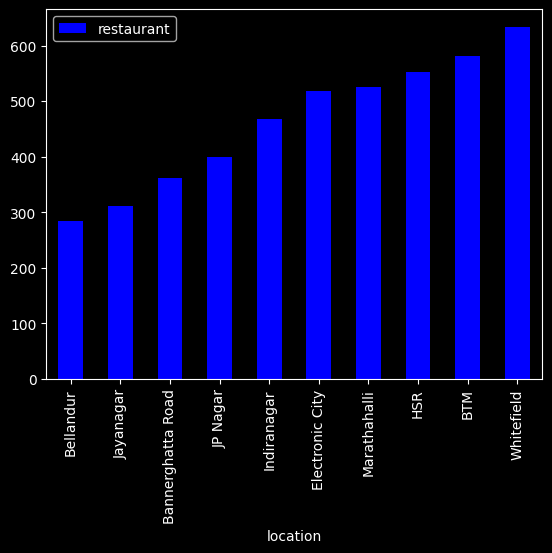

In [ ]:
df_total.sort_values(by='restaurant').tail(10).plot.bar(color='blue')

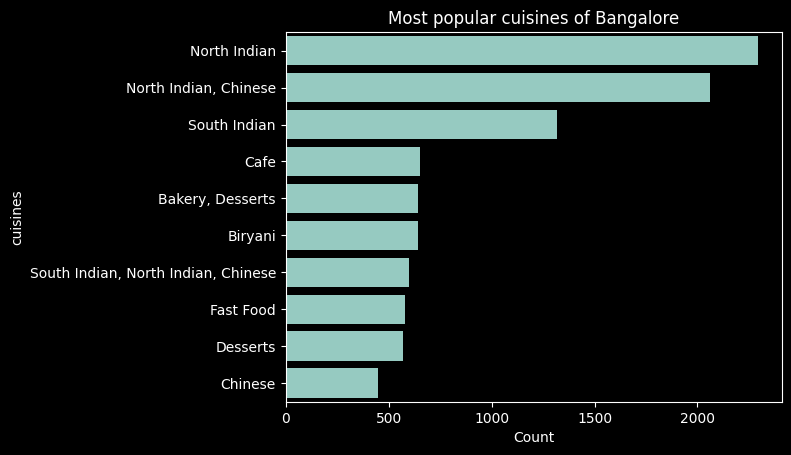

In [ ]:
cuisines = data['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines, y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.show()

In [ ]:
data['approx_cost(for two people)'].isna().sum()

252

In [ ]:
data.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [ ]:
data['approx_cost(for two people)'].isna().sum()

0

In [ ]:
len(data['approx_cost(for two people)'].value_counts())

66

In [ ]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [ ]:
data['approx_cost(for two people)'].dtype

dtype('O')

In [ ]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [ ]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(int)

In [ ]:
data['approx_cost(for two people)'].dtype

dtype('int64')

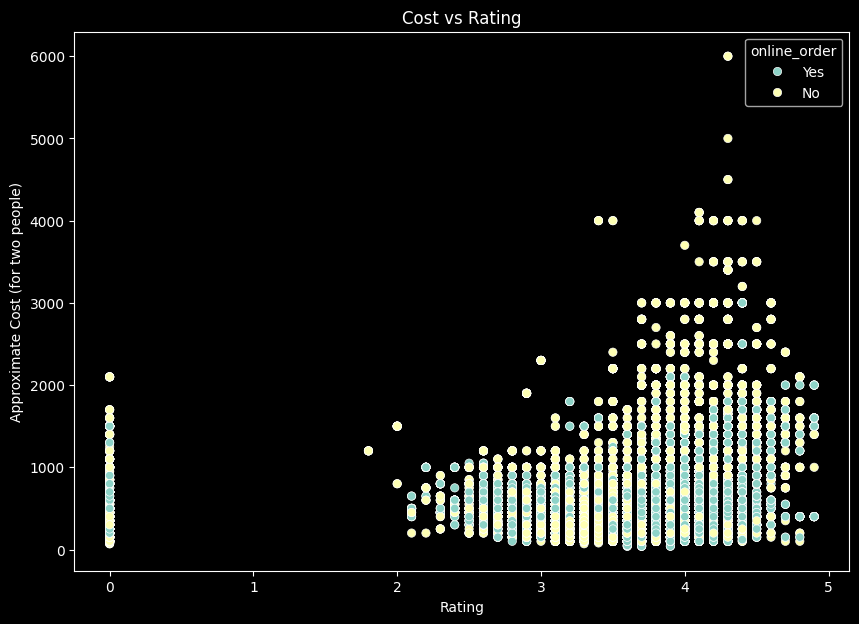

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="rate", y='approx_cost(for two people)', hue='online_order', data=data)
plt.title('Cost vs Rating')
plt.xlabel('Rating')
plt.ylabel('Approximate Cost (for two people)')
plt.show()

<Axes: xlabel='online_order', ylabel='votes'>

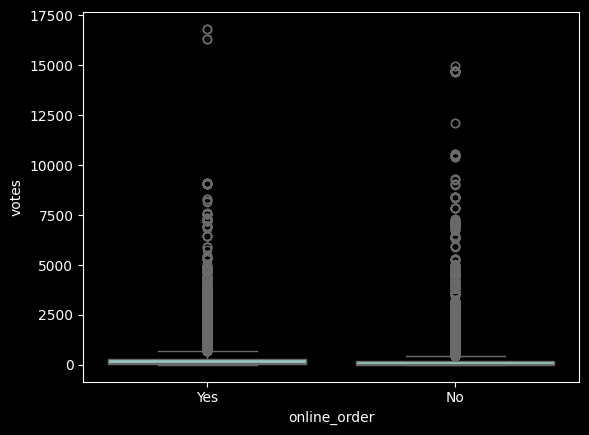

In [ ]:
sns.boxplot(x='online_order',y='votes',data=data)

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

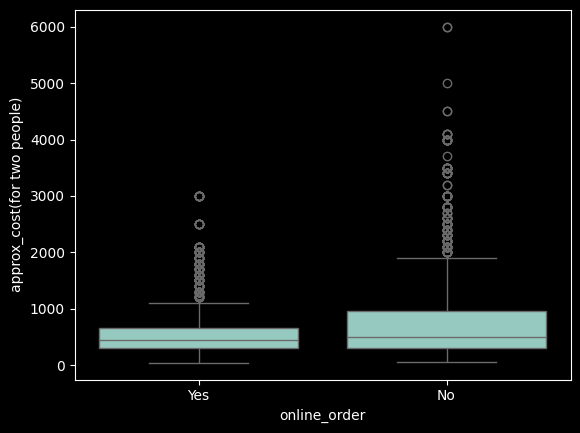

In [ ]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=data)

hence "Restaurants accepting online orders are lest costlier than not accepting"

In [ ]:
print("Max amount for two people")
data['approx_cost(for two people)'].max()

Max amount for two people


6000

In [ ]:
print("Minimum amount for two people")
data['approx_cost(for two people)'].min()

Minimum amount for two people


40

In [ ]:
data[data['approx_cost(for two people)']==6000]['name']

,name
19139,Le Cirque Signature - The Leela Palace
45618,Le Cirque Signature - The Leela Palace


In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['approx_cost(for two people)'] ,color='blue')
plt.show()

In [ ]:
plt.figure(figsize=(20,12))
data['approx_cost(for two people)'].value_counts().plot.bar(color='blue')

Most of the Price for 2 people lies below 1000 Rupees

In [ ]:
print("Taking Copy of Data in Data1")
data_1=data.copy()

In [ ]:
data_1[data_1['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

In [ ]:
data_1.set_index('name',inplace=True)

In [ ]:
data_1.head()

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Text(0.5, 1.0, 'Top 10 most expensive restaurants for 2 persons')

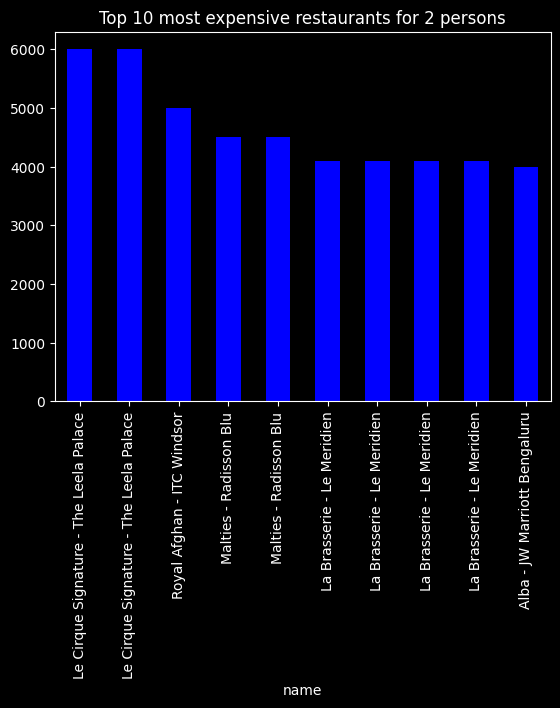

In [ ]:
data_1['approx_cost(for two people)'].nlargest(10).plot.bar(color='blue')
plt.title("Top 10 most expensive restaurants for 2 persons")

<Axes: title={'center': 'Top 10 most affordable restaurants for 2 persons'}, xlabel='name'>

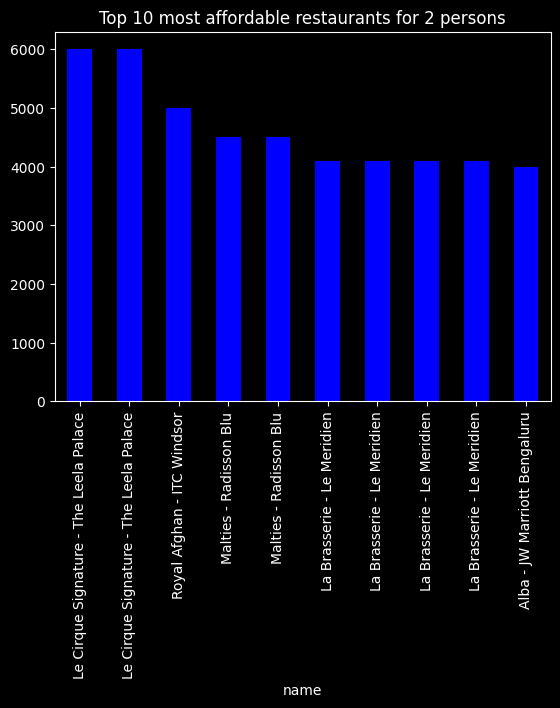

In [ ]:
plt.title("Top 10 most affordable restaurants for 2 persons")
data_1['approx_cost(for two people)'].nlargest(10).plot.bar(color='blue')

In [ ]:
data_1.set_index('location',inplace=True)

In [ ]:
data_1[data_1['approx_cost(for two people)']<=500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [ ]:
df_budget=data_1[data_1['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head().tail(10).style.background_gradient(cmap="Wistia")

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


<Axes: xlabel='approx_cost(for two people)'>

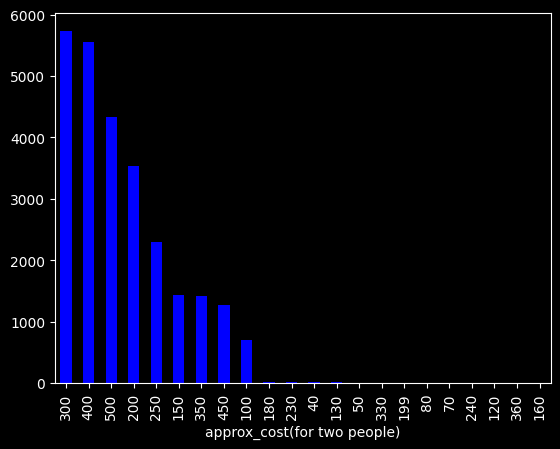

In [ ]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar(color='blue')

Hence most of dishes costs around 300 and 400 when it comes to less than 500

In [ ]:
data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)].shape

(4007, 17)

In [ ]:
df_new=data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)]
print(len(df_new['name'].unique()),"restaurants are having rating more than 4 as well as costs less than 500")

628 restaurants are having rating more than 4 as well as costs less than 500


In [ ]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [ ]:
len(location)

68

In [ ]:
len(total)

68

In [ ]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [ ]:
print("LOCATION DISTRIBUTION OF RATING GREATER THAN 4 AND COSTS LESS THAN RUPEES 500")
location_df.head(20).tail(10).style.background_gradient(cmap="Wistia")

LOCATION DISTRIBUTION OF RATING GREATER THAN 4 AND COSTS LESS THAN RUPEES 500


,restaurant
location,
City Market,1
Commercial Street,4
Cunningham Road,4
Domlur,5
Ejipura,1
Electronic City,23
Frazer Town,15
HBR Layout,3
HSR,58


Text(0, 0.5, 'Total restaurants')

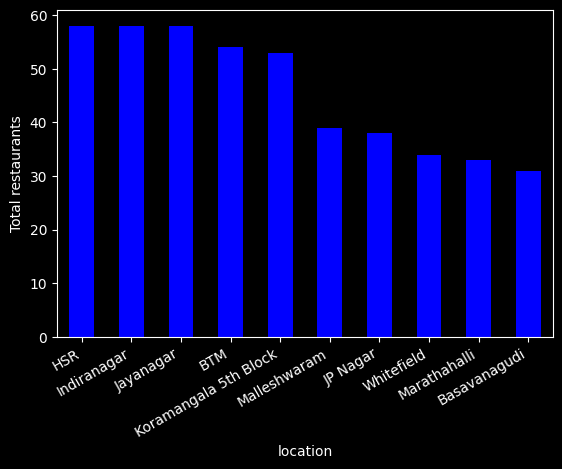

In [ ]:
location_df['restaurant'].nlargest(10).plot.bar(color='blue')
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

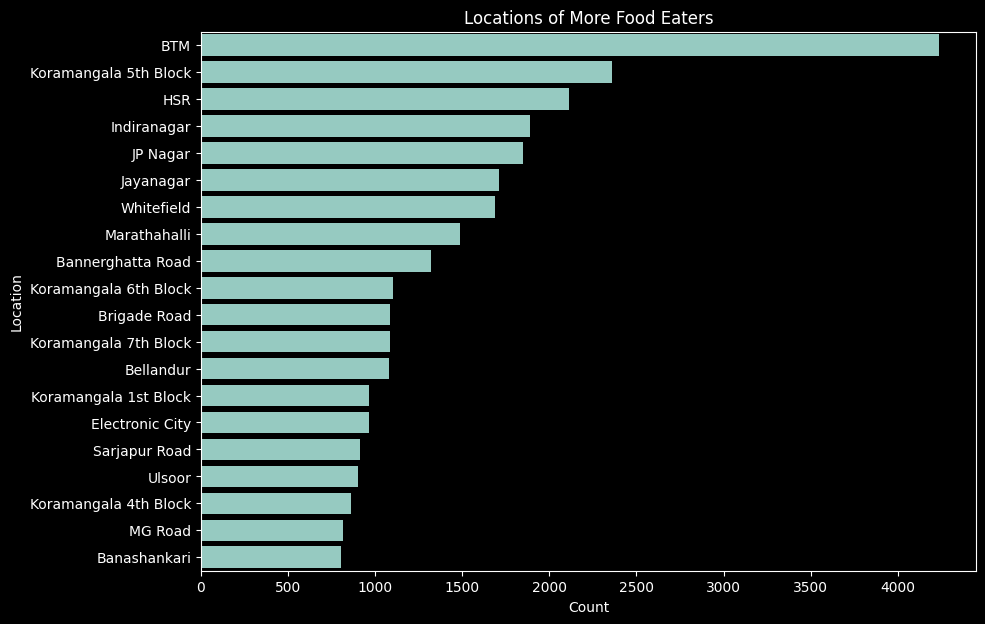

In [ ]:
plt.figure(figsize=(10, 7))
Restaurant_locations = data['location'].value_counts()[:20]
sns.barplot(x=Restaurant_locations, y=Restaurant_locations.index)
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Locations of More Food Eaters')
plt.show()

**GEOGRAPHICAL ANALYSIS**

In [ ]:
data.shape

(43690, 17)

In [ ]:
print("Unique locations in the Dataset")
len(data['location'].unique())

Unique locations in the Dataset


92

In [ ]:
locations=pd.DataFrame({"Name":data['location'].unique()})

In [ ]:
locations['new_Name']='Bangalore '+locations['Name']

In [ ]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [ ]:
Rest_locations.columns=['Name','count']
Rest_locations.head().style.background_gradient(cmap="Wistia")

In [ ]:
locations.shape

In [ ]:
Rest_locations.shape

In [ ]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

In [ ]:
Restaurant_locations.shape

In [ ]:
type(Restaurant_locations['geo_loc'][0])

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [ ]:
np.array(Restaurant_locations['geo_loc'])

In [ ]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [ ]:
type(lat)

In [ ]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [ ]:
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

In [ ]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()
print("BASEMAP of BENGALURU")
basemap

In [ ]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
print("Heated BaseMap")
basemap

Most of the Hotels and Restaurants are Located in CENTRAL BENGALURU and few are located away from CENTRAL BENGALURU

In [ ]:
print("NOW MODEL IMPLEMENTATION PART")

**DATA PREPARATION AND CLEANING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv("/content/drive/My Drive/zomato.csv")

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df=df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'], axis=1)
df.head()

In [ ]:
df.info()

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

In [ ]:
df['rate'].unique()

In [ ]:
def handlerate(value): #custom function
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)

df.rate=df['rate'].apply(handlerate)
df.rate.head()

In [ ]:
df.rate.isnull().sum()

In [ ]:
df.rate.fillna(df.rate.mean(), inplace=True)
df.rate.isnull().sum()

In [ ]:
df.dropna(inplace=True)
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
print("RENAMING")
df.rename(columns = {'approx_cost(for two people)':'Cost2Plates','listed_in(type)':'Type'},inplace=True)
df.head()

In [ ]:
print(len(df.Type.unique()))
print(len(df.rest_type.unique()))
print(len(df.location.unique()))

In [ ]:
df=df.drop(['listed_in(city)'],axis=1)
df.head()

In [ ]:
df.Cost2Plates.unique()

In [ ]:
def handlecost(value):
    value=str(value)
    if ',' in value:
        # we are simpling Replacing "," With no value ""
        value= value.replace(',','')
        return float(value)
    else:
        return float(value)

df.Cost2Plates=df.Cost2Plates.apply(handlecost)
df.Cost2Plates.unique()

In [ ]:
df.head()

In [ ]:
df.rest_type.value_counts()

In [ ]:
rest_types=df.rest_type.value_counts()
rest_type_lessthan_10=rest_types[rest_types<10]
rest_type_lessthan_10

In [ ]:
def handle_rest_type(value):
    if(value in rest_type_lessthan_10):
        return 'others'
    else:
        return value

df.rest_type=df.rest_type.apply(handle_rest_type)
df.rest_type.value_counts()

In [ ]:
df.head()

In [ ]:
df.location.value_counts()

In [ ]:
locations = df.location.value_counts()
location_less_than_10= locations[locations<10]
location_less_than_10

In [ ]:
def handle_location(value):
    if value in location_less_than_10 :
        return 'others'
    else:
        return value

df.location=df.location.apply(handle_location)
df.location.value_counts()

In [ ]:
df.head()

In [ ]:
cuisiness = df.cuisines.value_counts()
cuisiness_less_than_100= cuisiness[cuisiness<100]
cuisiness_less_than_100

In [ ]:
def handle_cuisiness(value):
    if value in cuisiness_less_than_100:
        return 'others'
    else:
        return value

df.cuisines=df.cuisines.apply(handle_cuisiness)
df.cuisines.value_counts()

In [ ]:
df.Type.value_counts()

In [ ]:
df.info()

In [ ]:
order_online = df.online_order.unique()
order_online_types = tuple(order_online)
print(order_online_types)

**DATA VISUALIZATION**

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(df['location'])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of Restaurants in Each Location', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
df['order_online_num'] = labelencoder.fit_transform(df['online_order'])
df['book_table_num'] = labelencoder.fit_transform(df['book_table'])
df['location_num'] = labelencoder.fit_transform(df['location'])
df['rest_type_num'] = labelencoder.fit_transform(df['rest_type'])
df['cuisines_num'] = labelencoder.fit_transform(df['cuisines'])
df['Type_num'] = labelencoder.fit_transform(df['Type'])

In [ ]:
df.head()

In [ ]:
df_num=df.drop(['name','online_order','book_table','location','rest_type','cuisines','Type', 'votes','order_online_num','book_table_num'], axis=1)

In [ ]:
df_num.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
cols = df_num.columns
ss = StandardScaler()
df_num = ss.fit_transform(df_num)
df_num = pd.DataFrame(df_num, columns=[cols])
df_num

In [ ]:
df_num['location_num'] = df_num['location_num']**5
df_num['Type_num'] = df_num['Type_num']**2
df_num['cuisines_num'] = df_num['cuisines_num']**5
df_num

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
ans = db.fit_predict(df_num)

In [ ]:
len(np.unique(ans))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=18000, random_state=0)
kmeans.fit(df_num)